# PyTorch Workflow
This document outlines a typical workflow for using PyTorch, (deep learning framework). The workflow includes the following steps:

1. **Import Libraries**: Start by importing the necessary libraries, including PyTorch and any other required packages.


In [86]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [87]:
# Creating data; linear regression; --> PyTorch to build model 
# --> gradient descent to estimate parameters

w = 0.8
b = 0.4

start = 0.0
end = 1.0
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze with dim=1 to make it a column vector
y = w * X + b
print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.4000],
        [0.4160],
        [0.4320],
        [0.4480],
        [0.4640],
        [0.4800],
        [0.4960],
        [0.5120],
        [0.5280],
        [0.5440]])


In [88]:
# Splitting data into training and test sets

train_split = int(0.7 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(35, 35, 15, 15)

In [89]:
# Function to visualize the data
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test, predictions=None):
    
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='predictions')

    plt.legend(prop={"size": 9}); #location of legend also can be given using '''loc="lower right"'''

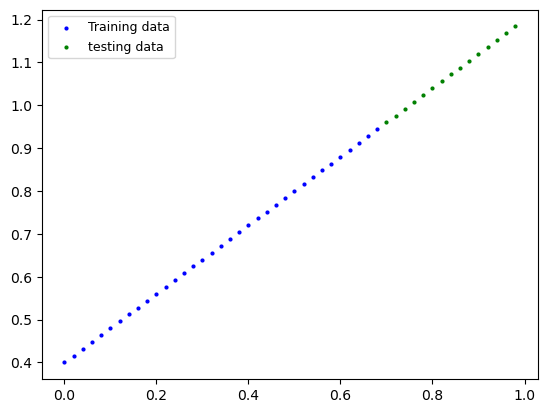

In [90]:
plot_predictions();

In [91]:
# Building the model : Creating a Linear Regression Model Class

class LinearRegressModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


# Model Building essentials
PyTorch has four (give or take) essential modules for building deep learning models:
1. `torch.nn` - neural networks
2. `torch.optim` - optimization algorithms
3. `torch.utils.data` - data loading and processing
4. `torch.utils.dara.DataLoader` - batching, shuffling, loading data in parallel
5. `torchvision` - computer vision utilities and datasets

Almost everything in a PyTorch neural network comes from torch.nn

- `nn.Module` contains the larger building blocks (layers)

- `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make nn.Module(s))

- `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)

- `torch.optim` contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

In [92]:
# Checking the contents of a PyTorch module

torch.manual_seed(42)

model_0 = LinearRegressModel()

print(list(model_0.parameters()))
print(model_0.state_dict()) # -> OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [93]:
# PyTorch having two modes:
'''Training mode
PyTorch needs to think, remember, and track everything
- Track gradients
- Save history of operations
- Update weights '''

# Inference (prediction) mode

'''PyTorch only needs to calculate outputs, not learn
- No gradients
- No memory tracking
- Faster + uses less RAM '''
# Use torch.inference_mode() when making predictions with a trained model — it’s faster, uses less memory, and makes sure gradients don’t get tracked accidentally.

with torch.inference_mode():
    y_predictions = model_0(X_test)

print(f"No. of testing samples: {len(X_test)} ")
print(f"No. of predictions made: {len(y_predictions)}")
print(f"Predicted values:\n{y_predictions}")

No. of testing samples: 15 
No. of predictions made: 15
Predicted values:
tensor([[0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


- In Linear Regression Example, we can see that one X value maps to one y value. In Deep Learning, we can have multiple X values mapping to multiple y values. as machine learning models are very flexible. You could have 100 input feature mapping to 1,2,10 etc. output features. It all depends on the problem you are trying to solve.

tensor([[0.5955],
        [0.6048],
        [0.6140],
        [0.6233],
        [0.6326],
        [0.6418],
        [0.6511],
        [0.6604],
        [0.6696],
        [0.6789],
        [0.6882],
        [0.6974],
        [0.7067],
        [0.7160],
        [0.7252]])


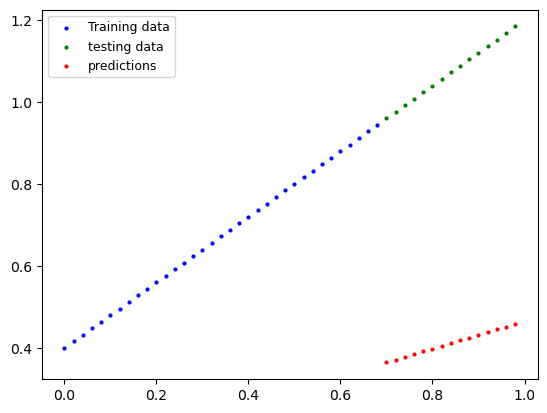

In [94]:
plot_predictions(predictions=y_predictions)
print(y_test - y_predictions)

We can see in this that predictions lokk pretty bad, as in our model we have used random parameter values *(weights and biases)* to make predictions. Next, we will see how to improve these parameters using optimization algorithms.

Training the Model

Creating a loss function and optimizer in PyTorch

### Key Training Components in PyTorch

| Function | What does it do? | Where does it live in PyTorch? | Common Values |
|----------|------------------|-------------------------------|----------------|
| **Loss Function** | Measures how wrong your model’s predictions (e.g., `y_predictions`) are compared to the true labels (e.g., `y_test`). Lower is better. | `torch.nn` | • Mean Absolute Error (MAE) – `torch.nn.L1Loss()` (regression)  <br> • Binary Cross Entropy – `torch.nn.BCELoss()` (binary classification) |
| **Optimizer** | Tells your model how to update its internal parameters to lower the loss. | `torch.optim` | • Stochastic Gradient Descent – `torch.optim.SGD()`  <br> • Adam Optimizer – `torch.optim.Adam()` |


- Since we are predicting numbers lets use MAE (which is under torch.nn.L1Loss()) in PyTorch as our Loss function
- Mean absolute error (MAE, in PyTorch: torch.nn.L1Loss) measures the absolute difference between two points (predictions and labels) and then takes the mean across all example

'''we'll use SGD, torch.optim.SGD(params, lr) where:

- params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
- lr is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).'''

In [95]:
# Creating Loss Fn

loss_fn = nn.L1Loss() # MAE loss == L1Loss

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # parameters of target modelto optimize

In [96]:
# Creating an optimization loop
#The training loop involves the model going through the training data and learning the relationships between the features and labels.

#The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).'''ArithmeticError

torch.manual_seed(42)

epochs = 200

# Lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    #=== Training

    # put the model in training mode
    model_0.train()

    # 1. forward pass on train data using forward method
    y_predictions = model_0(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_predictions, y_train)

    # 3. zero grad of the optimizer
    optimizer.zero_grad()

    # 4. loss backwards
    loss.backward()

    # 5. progress the optimizer
    optimizer.step()

    #=== Testing

    # put the model in evaluation mode
    model_0.eval()
    #print(X_test)

    with torch.inference_mode():
        # 1. forward pass on test data
        test_predictions = model_0(X_test)

        # 2. calculate loss on test data
        test_loss = loss_fn(test_predictions, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

        # Print out whats happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} ¦ MAE Train Loss: {loss} ¦ MAE Test Loss: {test_loss}")





Epoch: 0 ¦ MAE Train Loss: 0.42871588468551636 ¦ MAE Test Loss: 0.6475147008895874
Epoch: 10 ¦ MAE Train Loss: 0.3171558380126953 ¦ MAE Test Loss: 0.5189546346664429
Epoch: 20 ¦ MAE Train Loss: 0.20559588074684143 ¦ MAE Test Loss: 0.39039477705955505
Epoch: 30 ¦ MAE Train Loss: 0.10036273300647736 ¦ MAE Test Loss: 0.26707369089126587
Epoch: 40 ¦ MAE Train Loss: 0.06294900178909302 ¦ MAE Test Loss: 0.1943248063325882
Epoch: 50 ¦ MAE Train Loss: 0.05421588942408562 ¦ MAE Test Loss: 0.15948954224586487
Epoch: 60 ¦ MAE Train Loss: 0.05069488286972046 ¦ MAE Test Loss: 0.14260727167129517
Epoch: 70 ¦ MAE Train Loss: 0.04788605868816376 ¦ MAE Test Loss: 0.13159260153770447
Epoch: 80 ¦ MAE Train Loss: 0.04512668773531914 ¦ MAE Test Loss: 0.12281060218811035
Epoch: 90 ¦ MAE Train Loss: 0.0423981137573719 ¦ MAE Test Loss: 0.11551700532436371
Epoch: 100 ¦ MAE Train Loss: 0.03967132791876793 ¦ MAE Test Loss: 0.10747920721769333
Epoch: 110 ¦ MAE Train Loss: 0.0369507372379303 ¦ MAE Test Loss: 0.100

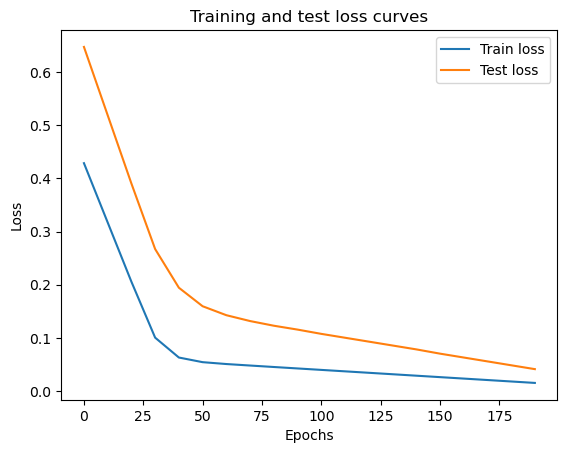

In [ ]:
# Plotting the Loss curves

plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



In [99]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: 0.7, bias: 0.3")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7291])), ('bias', tensor([0.4254]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [101]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_predictions = model_0(X_test)
y_predictions

tensor([[0.9358],
        [0.9503],
        [0.9649],
        [0.9795],
        [0.9941],
        [1.0087],
        [1.0233],
        [1.0378],
        [1.0524],
        [1.0670],
        [1.0816],
        [1.0962],
        [1.1108],
        [1.1253],
        [1.1399]])

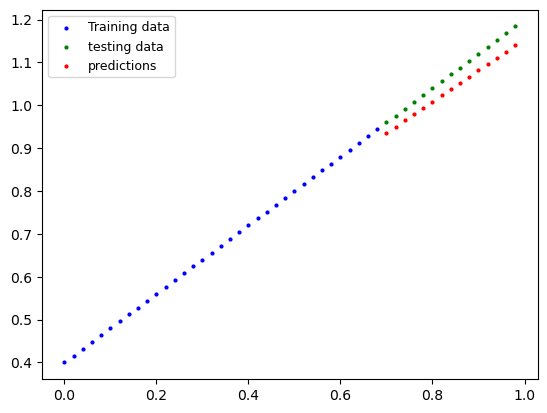

In [102]:
plot_predictions(predictions=y_predictions)